Simulations were made with: 150 FF motoneurons, 75 FR motoneurons, 75 S motoneurons and 300 Renshaw cells. All motoneurons were stimulated for 3.5 s at the same rate by asynchronous descending command inputs and in successive trials, the mean rates of the descending command signals inputs were 10, 20, 30,. . ., 400 pps (Uchiyama et al. 2003).

In [63]:
import sys
sys.path.insert(0, '..')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from InterneuronPool import InterneuronPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

The following should be used in the .rmto file in order to generate firing rate of 100pps with the ISI varying according to a gaussian distribution:

```
GammaOrder_CMExt,10,
DriveTarget_CMExt,FR,
DriveFunction_CMExt,100+0*t,
```

In [64]:
conf = Configuration('confuchiyama.rmto')

# Number of cells
idx = np.where(conf.confArray['f0']=='MUnumber_SOL-S')[0][0]
conf.confArray['f1'][idx] = 1
idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FR')[0][0]
conf.confArray['f1'][idx] = 1
idx = np.where(conf.confArray['f0']=='MUnumber_SOL-FF')[0][0]
conf.confArray['f1'][idx] = 2
idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
conf.confArray['f1'][idx] = 4
idx = np.where(conf.confArray['f0']=='Number_CMExt')[0][0]
conf.confArray['f1'][idx] = 4

# Connectivity changes
#idx = np.where(conf.confArray['f0']=='Con:CMExt->SOL-S@dendrite|excitatory')[0][0]
#conf.confArray['f1'][idx] = 100

# Duration of simulation
conf.simDuration_ms = 1000

# Parameters from java
## Connectivity
idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-S@soma|inhibitory')[0][0]
conf.confArray['f1'][idx] = 100
idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FR@soma|inhibitory')[0][0]
conf.confArray['f1'][idx] = 100
idx = np.where(conf.confArray['f0']=='Con:RC_ext->SOL-FF@soma|inhibitory')[0][0]
conf.confArray['f1'][idx] = 100
idx = np.where(conf.confArray['f0']=='Con:SOL-S>RC_ext-@soma|excitatory')[0][0]
conf.confArray['f1'][idx] = 100
idx = np.where(conf.confArray['f0']=='Con:SOL-FR>RC_ext-@soma|excitatory')[0][0]
conf.confArray['f1'][idx] = 100
idx = np.where(conf.confArray['f0']=='Con:SOL-FF>RC_ext-@soma|excitatory')[0][0]
conf.confArray['f1'][idx] = 100

## Conductances
idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-S@soma|inhibitory')[0][0]
conf.confArray['f1'][idx] = 0.44
idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FR@soma|inhibitory')[0][0]
conf.confArray['f1'][idx] = 0.3
idx = np.where(conf.confArray['f0']=='gmax:RC_ext->SOL-FF@soma|inhibitory')[0][0]
conf.confArray['f1'][idx] = 0.24
idx = np.where(conf.confArray['f0']=='gmax:SOL-S>RC_ext-@soma|excitatory')[0][0]
conf.confArray['f1'][idx] = 0.15
idx = np.where(conf.confArray['f0']=='gmax:SOL-FR>RC_ext-@soma|excitatory')[0][0]
conf.confArray['f1'][idx] = 0.17
idx = np.where(conf.confArray['f0']=='gmax:SOL-FF>RC_ext-@soma|excitatory')[0][0]
conf.confArray['f1'][idx] = 0.3

## Morphology
idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
conf.confArray['f1'][idx] = 65
conf.confArray['f2'][idx] = 65
idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
conf.confArray['f1'][idx] = 285
conf.confArray['f2'][idx] = 285
idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
conf.confArray['f1'][idx] = 200
conf.confArray['f2'][idx] = 200

In order to obtain the mean firing rate of a single S-type MN, for example, the number of spikes discharged from 0.5 s to 3.5 s was divided by 3 s. The ensemble average of the rates of all S-type MNs (including the zero rates of nonactive MNs) was then calculated as the mean of the individual rates (Uchiyama et al. 2003).

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Interneuron Pool of RC ext built
Descending Command CMExt built
All the 37 synapses were built
Synaptic Noise on RC_ext built
All the 4 synaptic noises were built


<IPython.core.display.Javascript object>


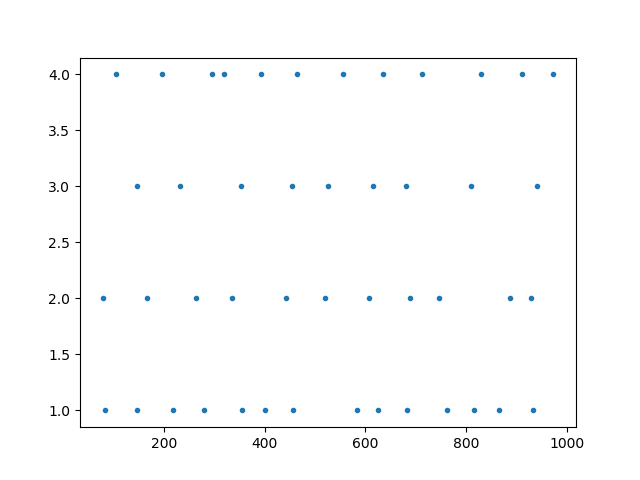

In [65]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = InterneuronPool(conf, 'RC', 'ext')
pools[2] = NeuralTract(conf, 'CMExt')
    
Syn = SynapsesFactory(conf, pools)

t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

somaMN_mV = np.zeros_like(t)

for i in xrange(0, len(t)):
    pools[2].atualizePool(t[i]) # Neural tract
    pools[0].atualizeMotorUnitPool(t[i]) # MN pool
    pools[3].atualizePool(t[i]) # RC synaptic Noise
    pools[1].atualizeInterneuronPool(t[i]) # RC pool
    somaMN_mV[i] = pools[0].unit[0].v_mV[1]

pools[0].listSpikes()
pools[1].listSpikes()
pools[2].listSpikes()

plt.figure()
plt.plot(pools[2].poolTerminalSpikes[:, 0],
         pools[2].poolTerminalSpikes[:, 1]+1, '.')